# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [27]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [61]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [62]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
# Data Size
df.shape

(48842, 15)

In [64]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [65]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# JAWABAN
# Variable yang hilang
# 1. workclass = 964 missing
# 2. occupation = 966 missing
# 3. native-country = 274 missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [66]:
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [67]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df['workclass'].fillna('Others', inplace=True)
df['occupation'].fillna('Others', inplace=True)
df['native-country'].fillna('Others', inplace=True)


/tmp/ipython-input-2820207113.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna('Others', inplace=True)
/tmp/ipython-input-2820207113.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [68]:
# cek missing value
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [69]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
cat_features = df.select_dtypes(include=['object']).columns
for col in cat_features:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False).head(20))  # lihat 20 besar
    print("Unique values:", df[col].nunique())


=== workclass ===
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Others                963
Without-pay            21
Never-worked           10
Name: count, dtype: int64
Unique values: 10

=== education ===
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
Unique values: 16

=== marital-status ===
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse

In [70]:
for col in ['workclass','occupation','native-country']:
    df[col] = df[col].replace('?', 'Others')

# ngehapus duplikasi kesalahan penulisan di income
df['income'] = df['income'].replace({
    '<=50K': 'Low',
    '>50K': 'High',
    '<=50K.': 'Low',
    '>50K.': 'High'
})


In [71]:
cat_features = df.select_dtypes(include=['object']).columns
for col in cat_features:
    print(f"\n=== {col} ===")
    print(df[col].value_counts(dropna=False).head(20))
    print("Unique values:", df[col].nunique())


=== workclass ===
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
Unique values: 9

=== education ===
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
Unique values: 16

=== marital-status ===
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, 

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

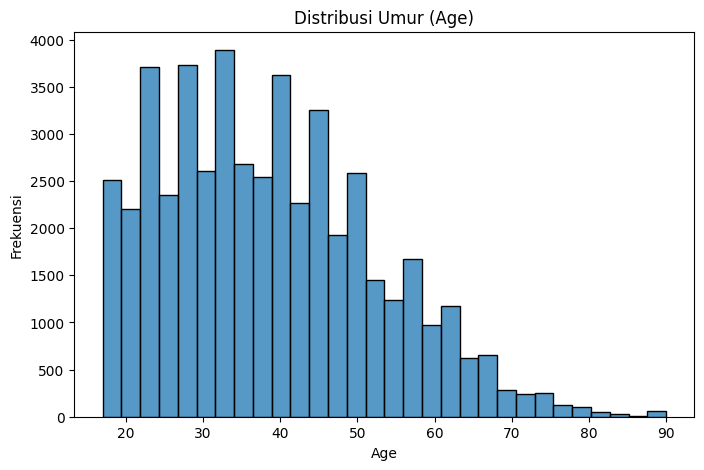

In [72]:
# Jawab 1.1 - Histrogram

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=False)
plt.title("Distribusi Umur (Age)")
plt.xlabel("Age")
plt.ylabel("Frekuensi")
plt.show()

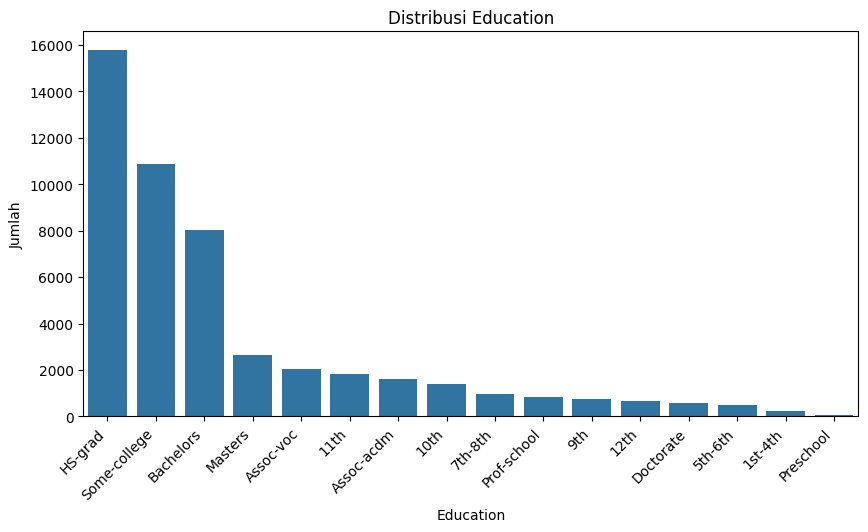

In [77]:
# Jawab 1.2 - Barchart

plt.figure(figsize=(10,5))
order = df['education'].value_counts().index  # urutkan dari yang paling sering
sns.countplot(data=df, x='education', order=order)
plt.title("Distribusi Education")
plt.xlabel("Education")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.show()

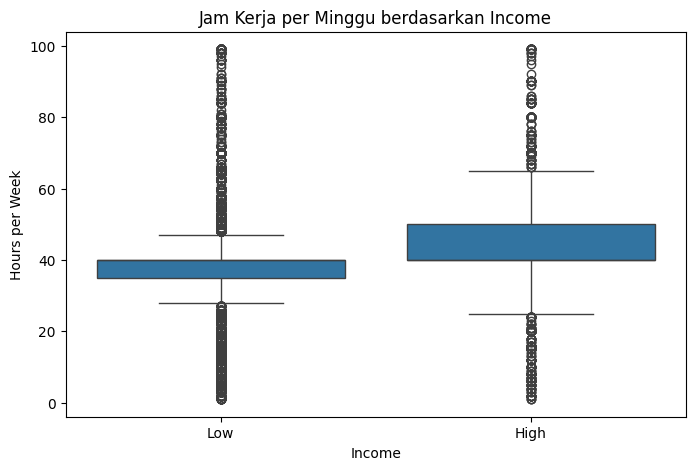

In [76]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title("Jam Kerja per Minggu berdasarkan Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

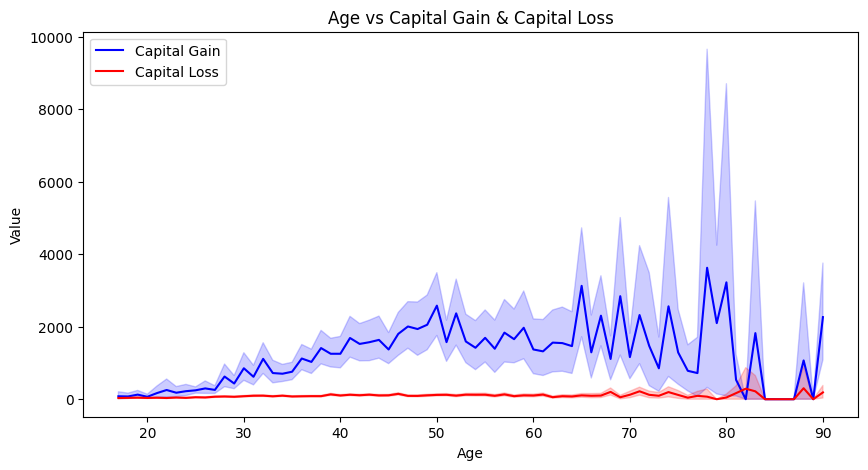

In [75]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='age', y='capital-gain', label='Capital Gain', color="blue")
sns.lineplot(data=df, x='age', y='capital-loss', label='Capital Loss', color="red")
plt.title("Age vs Capital Gain & Capital Loss")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
  1. Terjadi distribusi tidak normal, skewed nganan rata-rata direntang umur 20 sampai 50
  kemudian turun. jadi yang kerja diatas umur itu sedikit
  2. Melakukan imputasi dengan mean atau median karena datanya berupa nominal
  3. Kategori low income merupakan kategori dengan outlier terbanyak
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [81]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# import library tambahane
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])
print(df[['sex', 'income']].head())


   sex  income
0    1       1
1    1       1
2    1       1
3    1       1
4    0       1


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

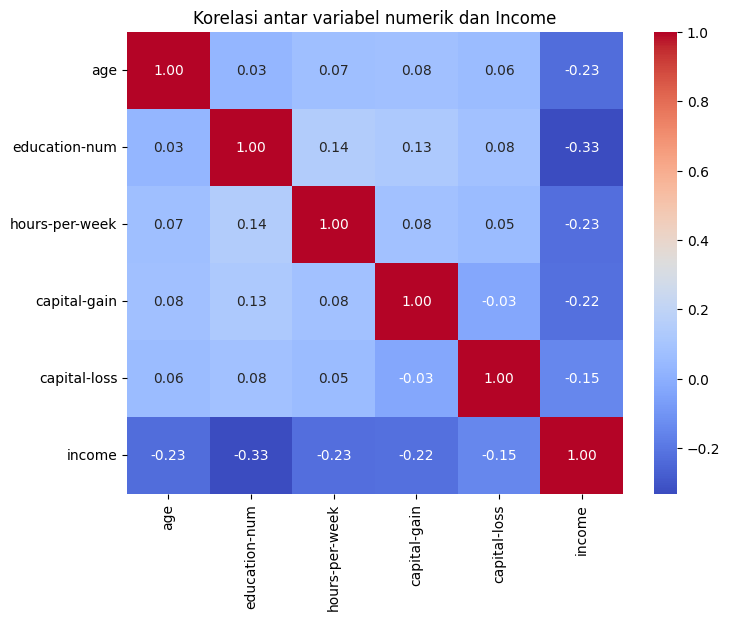

In [82]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# kolom
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()

# Visualisasi
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel numerik dan Income")
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
semua variabel dengan target income memiliki korelasi yang negatif
education-num memiliki korelasi yang tinggi dengan pendapatan
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [83]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


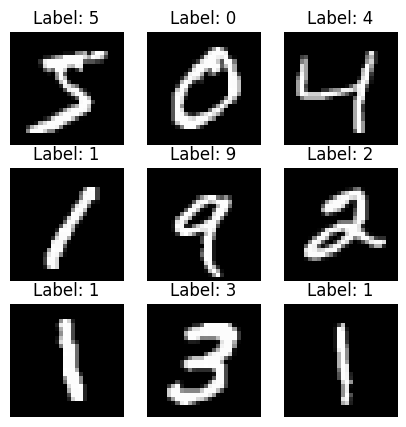

In [84]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Upsampled train shape: (60000, 32, 32)
Upsampled test shape: (10000, 32, 32)


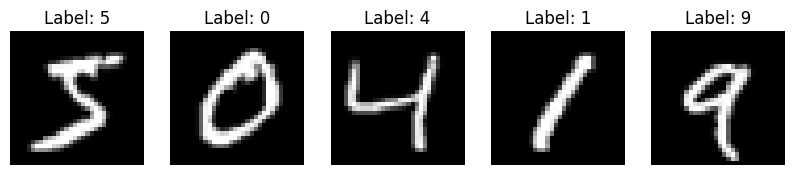

In [85]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import cv2

# Array kosong upsampling
X_train_up = np.zeros((X_train.shape[0], 32, 32), dtype=np.uint8)
X_test_up  = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

# Upsampling train data
for i in range(X_train.shape[0]):
    X_train_up[i] = cv2.resize(X_train[i], (32, 32), interpolation=cv2.INTER_CUBIC)

# Upsampling test data
for i in range(X_test.shape[0]):
    X_test_up[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Upsampled train shape:", X_train_up.shape)
print("Upsampled test shape:", X_test_up.shape)

#  5 sampel hasil upsampling
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [86]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Normalisasi rentang 0-1
X_train_norm = X_train_up.astype("float32") / 255.0
X_test_norm  = X_test_up.astype("float32") / 255.0

print("Range train:", X_train_norm.min(), "->", X_train_norm.max())
print("Range test :", X_test_norm.min(), "->", X_test_norm.max())


Range train: 0.0 -> 1.0
Range test : 0.0 -> 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [105]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Langsung reshape semua data jadi (10000, 1024)
X_test_flat = X_test_up.reshape(X_test_up.shape[0], -1)

print("Sebelum flatten:", X_test_up.shape)   # (10000, 32, 32)
print("Sesudah flatten:", X_test_flat.shape) # (10000, 1024)

# Contoh cek isi data flatten
print("Contoh data flatten:\n", X_test_flat[0][:1000])

Sebelum flatten: (10000, 32, 32)
Sesudah flatten: (10000, 1024)
Contoh data flatten:
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  